In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load Data, EDA & Data Cleansing

In [14]:
# statistik harian nasional
daily_stats= pd.read_excel("COVID-19 Indonesia.xlsx")
daily_stats.head()

,Date,Kasus harian,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),...,Positif DKI,Unnamed: 76,Pos Rate DKI,Pos Rate DKI - 7 harian,NON DKI,Positif Non DKI,Unnamed: 81,Pos Rate Non DKI,Pos Rate Non DKI - 7 harian,CFR
0,2020-03-02,2.0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-05,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-06,2.0,0.0,2.0,4.0,4.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
kolom=["Date","Dosis pertama (harian)", "Dosis kedua (harian)"]
daily_stats=daily_stats[kolom]
daily_stats.dropna(how='all',inplace=True)

In [18]:
daily_stats.head()

,Date,Dosis pertama (harian),Dosis kedua (harian)
0,2020-03-02,NaN,NaN
1,2020-03-03,NaN,NaN
2,2020-03-04,NaN,NaN
3,2020-03-05,NaN,NaN
4,2020-03-06,NaN,NaN


In [19]:
daily_stats.fillna(0,inplace=True)

In [20]:
daily_stats.head()

,Date,Dosis pertama (harian),Dosis kedua (harian)
0,2020-03-02,0.0,0.0
1,2020-03-03,0.0,0.0
2,2020-03-04,0.0,0.0
3,2020-03-05,0.0,0.0
4,2020-03-06,0.0,0.0


In [21]:
daily_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 538
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    539 non-null    datetime64[ns]
 1   Dosis pertama (harian)  539 non-null    float64       
 2   Dosis kedua (harian)    539 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 16.8 KB


In [22]:
daily_stats.set_index("Date",inplace=True)

In [24]:
daily_stats.tail()

,Dosis pertama (harian),Dosis kedua (harian)
Date,,
2021-08-19,644813.0,702847.0
2021-08-20,357948.0,355245.0
2021-08-21,598148.0,619482.0
2021-08-22,56022.0,34715.0
2021-08-23,675502.0,638469.0


## Kasus Harian Per Provinsi

In [30]:
daily_cases=pd.read_excel("COVID-19 Indonesia.xlsx", sheet_name="Kasus Aktif")
daily_cases.fillna(0,inplace=True)
daily_cases.set_index("Date",inplace=True)
daily_cases.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-15,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-16,0.0,0.0,1.0,0.0,0.0,0.0,14.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-18,0.0,0.0,4.0,0.0,0.0,1.0,30.0,0.0,12.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-19,0.0,0.0,10.0,0.0,0.0,2.0,52.0,0.0,2.0,4.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Kasus Sembuh Harian

In [34]:
daily_recovered=pd.read_excel("COVID-19 Indonesia.xlsx", sheet_name="Sembuh Harian")
daily_recovered.fillna(0,inplace=True)
daily_recovered.set_index("Date",inplace=True)
daily_recovered.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-22,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Kasus Meninggal Harian

In [40]:
daily_death=pd.read_excel("COVID-19 Indonesia.xlsx", sheet_name="Meninggal Harian")
daily_death.fillna(0,inplace=True)
daily_death.set_index("Date",inplace=True)
daily_death.head()

,Aceh,Bali,Banten,Babel,Bengkulu,DIY,Jakarta,Jambi,Jabar,Jateng,...,Sulteng,Lampung,Riau,Malut,Maluku,Papbar,Papua,Sulbar,NTT,Gorontalo
Date,,,,,,,,,,,,,,,,,,,,,
2020-03-21,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-22,0.0,1.0,1.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-24,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-25,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory Data Analysis

- Bagaimana perkembangan COVID-19 di Indonesia sampai 23 Agustus 2021
- Apakah kita sudah mengalami puncak kedua ?
- Provinsi mana yang paling banyak kasusnya ?
- Apakah PPKM sudah cukup efektif mengurangi kasus COVID-19 ?
- Bagaimana progress dari vaksinasi yang dilakukan di Indonesia ?

In [45]:
daily_cases['Nasional']=daily_cases.sum(axis=1)
daily_recovered['Nasional']=daily_recovered.sum(axis=1)
daily_death['Nasional']=daily_death.sum(axis=1)

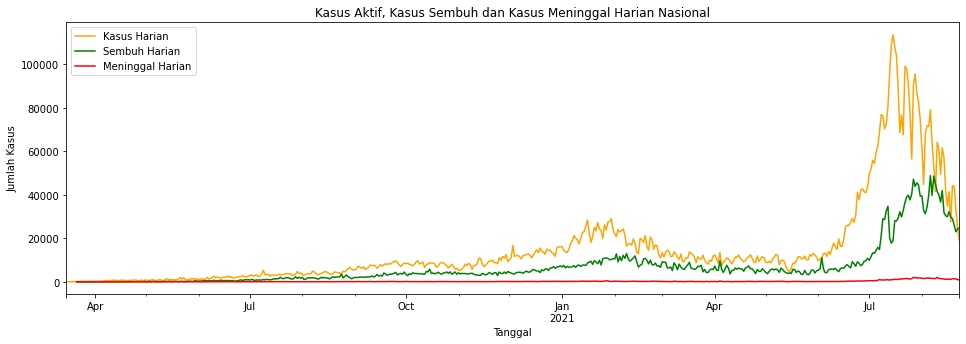

In [53]:
fig,ax=plt.subplots(figsize=(16,5))
daily_cases['Nasional'].plot(kind='line',ax=ax,label="Kasus Harian",color='orange');
daily_recovered['Nasional'].plot(kind='line',ax=ax,label="Sembuh Harian",color='green');
daily_death['Nasional'].plot(kind='line',ax=ax,label="Meninggal Harian",color='red');

ax.set_title("Kasus Aktif, Kasus Sembuh dan Kasus Meninggal Harian Nasional")
ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Kasus")
ax.legend();

In [54]:
island_prov={
    'Aceh':'Sumatera','Bali':'Bali-Nusa Tenggara','Banten':'Jawa','Babel':'Sumatera', 'Bengkulu':'Sumatera', 'DIY':'Jawa',
    'Jakarta':'Jawa', 'Jambi':'Sumatera', 'Jabar':'Jawa', 'Jateng':'Jawa', 'Jatim':'Jawa', 'Kalbar':'Kalimantan',
    'Kaltim':'Kalimantan', 'Kalteng':'Kalimantan', 'Kalsel':'Kalimantan', 'Kaltara':'Kalimantan', 'Kep Riau':'Sumatera',
    'NTB':'Bali-Nusa Tenggara', 'Sumsel':'Sumatera', 'Sumbar':'Sumatera', 'Sulut':'Sulawesi', 'Sumut':'Sumatera',
    'Sultra':'Sulawesi', 'Sulsel':'Sulawesi', 'Sulteng':'Sulawesi', 'Lampung':'Sumatera', 'Riau':'Sumatera',
    'Malut':'Maluku - Papua', 'Maluku':'Maluku - Papua', 'Papbar':'Maluku - Papua', 'Papua':'Maluku - Papua',
    'Sulbar':'Sulawesi', 'NTT':'Bali-Nusa Tenggara', 'Gorontalo':'Sulawesi'
}


In [67]:
daily_cases_region=daily_cases.rename(columns=island_prov).drop('Nasional',axis=1)
daily_cases_region=daily_cases_region.T
daily_cases_region=daily_cases_region.groupby(daily_cases_region.index).sum().T

In [68]:
daily_cases_region

,Bali-Nusa Tenggara,Jawa,Kalimantan,Maluku - Papua,Sulawesi,Sumatera
Date,,,,,,
2020-03-15,0.0,21.0,0.0,0.0,0.0,0.0
2020-03-16,0.0,17.0,0.0,0.0,0.0,0.0
2020-03-17,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-18,0.0,49.0,1.0,0.0,0.0,3.0
2020-03-19,0.0,71.0,2.0,0.0,5.0,4.0
...,...,...,...,...,...,...
2021-08-19,1965.0,10014.0,3077.0,339.0,2247.0,4411.0
2021-08-20,1729.0,10919.0,2558.0,224.0,1780.0,4794.0
2021-08-21,1360.0,7300.0,2047.0,255.0,1526.0,4256.0


Figure(1152x360)


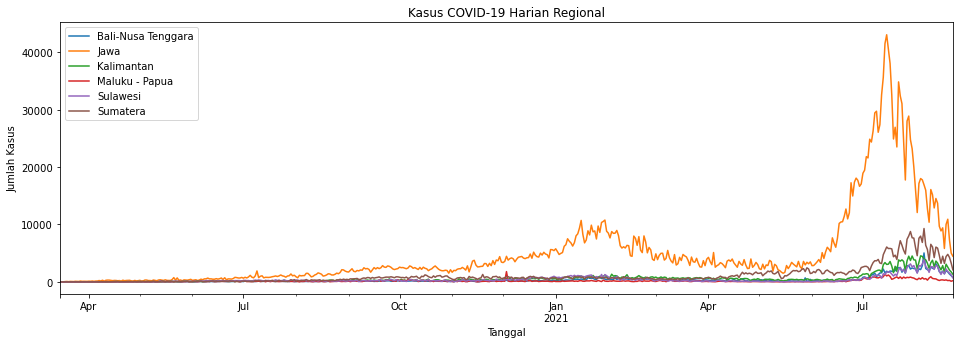

In [73]:
fig,ax=plt.subplots(figsize=(16,5))

daily_cases_region.plot(kind='line',ax=ax);

ax.set_title("Kasus COVID-19 Harian Regional")
ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Kasus")
ax.legend();

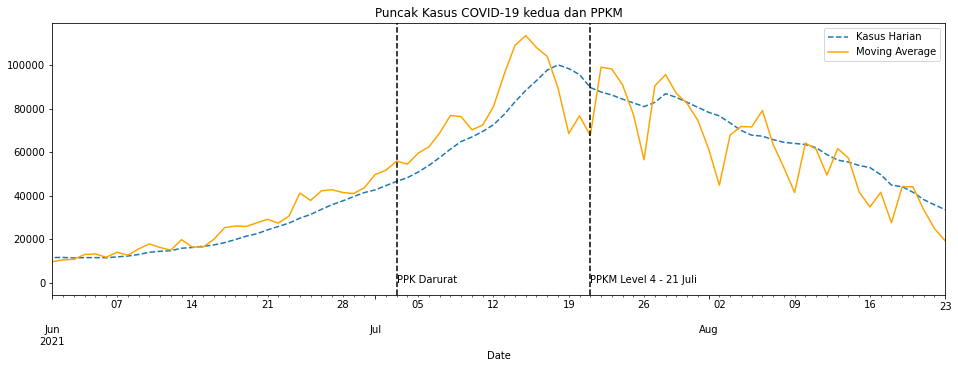

In [89]:
fig,ax=plt.subplots(figsize=(16,5))

MA_cases=daily_cases['Nasional'].rolling(window=7).mean()
MA_cases.plot(kind='line',ax=ax,label="Kasus Harian",ls='--');
daily_cases['Nasional'].plot(kind='line',ax=ax,label="Moving Average",color='orange');

#grafik anotasi ppkm
ax.axvline(x='2021-07-03',color='black',ls='--');
ax.annotate('PPK Darurat',('2021-07-03',1))
ax.axvline(x='2021-07-21',color='black',ls='--');
ax.annotate('PPKM Level 4 - 21 Juli',('2021-07-21',1))
ax.set_title("Puncak Kasus COVID-19 kedua dan PPKM")
ax.legend();
ax.set_xlim("2021-06-01","2021-08-23");